# COSC 5557
# Exploratory Data Analysis
# Almountassir Bellah Aljazwe

---

For this exercise, you will have a look at the raw data before doing any machine learning. This is to familiarize yourself with the data, see if there are any potential problems or obstacles for applying machine learning, and if and what preprocessing may be helpful.

Your deliverable will be a report, written in a style that it would be suitable for inclusion in an academic paper as the "Experimental Setup" section or similar. If unsure, check an academic paper of your choice, for example this one. The level of detail should be higher than in a typical academic paper though. Your report should be at most five pages, including references and figures but excluding appendices. It should have the following structure:

- Introduction: What problem are you solving, how are you going to solve it.
- Results of the Analysis: Describe the data you're using, e.g. how many features and observations, what are you predicting, any missing values, etc. Include plots as appropriate.
- Code: Add the code you've used as a separate file.
Your report must contain enough detail to reproduce what you did without the code. If in doubt, include more detail.

There is no required format for the report. You could, for example, use an iPython notebook. Your report should contain a lot of plots or tables to illustrate the data. Describe any issues you found with the data.

---

# Data

Have a look at two different datasets. Ideally, they should have different characteristics so that the results of your analysis will be different. You could use, for example, the Wine Quality dataset (choose the type of wine of your preference) and the Primary Tumor dataset. You may also use a dataset of your choice, for example one that's relevant to your research.

Choose a small number of preprocessing methods (e.g. normalizing feature values) and explore their application to the data. This could, for example, include showing the distribution of feature values before and after preprocessing.

---

# Resources

https://youtu.be/78ut-S-QOEQ?si=VVnqu2TxlEBg3xoz

---

## Store the Required Datasets as Pandas Dataframes

Datasets to download :
 - https://archive.ics.uci.edu/dataset/186/wine+quality (Red Wine Quality Dataset)
 - https://www.openml.org/search?type=data&sort=runs&id=1003&status=active (Primary Tumor Dataset)

In [1]:
from scipy.io import arff
import pandas as pd

red_wine_quality_file = "winequality-red.csv"
primary_tumor_file = arff.loadarff('primary-tumor.arff')

red_wine_quality_df = pd.read_csv(red_wine_quality_file)
primary_tumor_df = pd.DataFrame(primary_tumor_file[0])

## Check the Pandas Dataframes

In [2]:
primary_tumor_df.head(5)

,age,sex,histologic-type,degree-of-diffe,bone,bone-marrow,lung,pleura,peritoneum,liver,brain,skin,neck,supraclavicular,axillar,mediastinum,abdominal,binaryClass
0,b'>=60',b'female',b'?',b'?',b'no',b'no',b'no',b'no',b'no',b'yes',b'no',b'no',b'no',b'no',b'no',b'no',b'no',b'P'
1,b'>=60',b'male',b'?',b'poorly',b'no',b'no',b'no',b'no',b'no',b'yes',b'no',b'no',b'no',b'yes',b'no',b'yes',b'no',b'P'
2,b'30-59',b'female',b'adeno',b'?',b'no',b'no',b'no',b'yes',b'no',b'no',b'no',b'yes',b'no',b'no',b'yes',b'no',b'no',b'N'
3,b'30-59',b'female',b'adeno',b'?',b'no',b'no',b'no',b'no',b'yes',b'no',b'no',b'no',b'no',b'no',b'no',b'no',b'no',b'N'
4,b'30-59',b'female',b'adeno',b'?',b'no',b'no',b'no',b'yes',b'yes',b'no',b'no',b'no',b'no',b'no',b'no',b'no',b'no',b'N'


In [3]:
red_wine_quality_df.head(5)

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
1,7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5
2,7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;...
3,11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58...
4,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5


## Initial Clean up of the Dataframes

 1. The 'Primary Tumor' dataframe contains unwanted characters around the feature values - `b''` which after looking it up, it seems to represent bytes; we want the data as `utf-8`.
 2. The 'Red Wine Quality' dataframe is not divided into the column features properly; the features are all a single column (verify with `df.shape()`).

### Task 1

**RESOURCE : https://stackoverflow.com/questions/49806439/letter-appeared-in-data-when-arff-loaded-into-python**

In [4]:
primary_tumor_df.columns

Index(['age', 'sex', 'histologic-type', 'degree-of-diffe', 'bone',
       'bone-marrow', 'lung', 'pleura', 'peritoneum', 'liver', 'brain', 'skin',
       'neck', 'supraclavicular', 'axillar', 'mediastinum', 'abdominal',
       'binaryClass'],
      dtype='object')

In [5]:
# !!!!!!!!!
# IMPORTANT - only run this code cell once; if ran for more than once, you get NaN values in the dataframe; if you get that, re-run whole notebook again.
# !!!!!!!!!

# We will go through all the columns in the dataframe and apply a decoding from datatype of bytes to UTF-8:
for column in primary_tumor_df.columns:
  primary_tumor_df[column] = primary_tumor_df[column].str.decode('utf-8')

primary_tumor_df

,age,sex,histologic-type,degree-of-diffe,bone,bone-marrow,lung,pleura,peritoneum,liver,brain,skin,neck,supraclavicular,axillar,mediastinum,abdominal,binaryClass
0,>=60,female,?,?,no,no,no,no,no,yes,no,no,no,no,no,no,no,P
1,>=60,male,?,poorly,no,no,no,no,no,yes,no,no,no,yes,no,yes,no,P
2,30-59,female,adeno,?,no,no,no,yes,no,no,no,yes,no,no,yes,no,no,N
3,30-59,female,adeno,?,no,no,no,no,yes,no,no,no,no,no,no,no,no,N
4,30-59,female,adeno,?,no,no,no,yes,yes,no,no,no,no,no,no,no,no,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,30-59,female,adeno,well,no,no,no,no,yes,no,no,no,no,no,no,no,no,N
335,30-59,male,epidermoid,poorly,yes,no,no,no,no,no,no,yes,no,no,yes,no,no,P
336,30-59,female,adeno,well,no,no,no,yes,yes,no,no,no,no,no,no,no,no,N
337,30-59,female,adeno,?,yes,no,yes,yes,yes,yes,yes,no,no,no,no,no,yes,N


### Task 2

**RESOURCE : https://youtu.be/5_QXMwezPJE?si=Q3U0Rs9h1wAS8jTI&t=230**

In [6]:
# We can see that the wine quality dataset is not in its proper structure:
red_wine_quality_df.shape

(1599, 1)

In [7]:
# The dataset should be 1559 x (number of columns) which is obviously more than 1;
# When read the csv data, pass in a separator (';' for our dataset) to split up the dataset based on the individual columns:

red_wine_quality_df = pd.read_csv(red_wine_quality_file, sep=';')

red_wine_quality_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [8]:
# Verify correctness with the '.shape' method once again:
red_wine_quality_df.shape

(1599, 12)

## Observe the Sizes of the Datasets



### Primary Tumor Dataset

In [9]:
primary_tumor_df.shape

(339, 18)

### Red Wine Quality Dataset

In [10]:
red_wine_quality_df.shape

(1599, 12)

### Commentary on the Sizes of the Datasets

As can be observed, two of the mentioned datasets contain slightly differing sizes, with regards to the number of samples (rows) and features (columns). With regards to the number of samples, I predict differing variances in model performance; the model, which trains on a higher number of samples, will have lower variance than the model, which trains on a lower number of samples...

(EXPLAIN THE EFFECT OF NUMBER OF FEATURES)

## Observe the Target Features of the Datasets

- What do the target features represent or mean?
- Are they multiple classes or binary classes?
- What is the distribution of the samples (rows) with regards to their target feature value? Is it balanced, or does one feature value correspond to the majority of the samples (rows)?

### Primary Tumor Dataset

In [11]:
target_feature = primary_tumor_df.columns[-1]
target_feature

'binaryClass'

In [12]:
primary_tumor_df[target_feature]

0      P
1      P
2      N
3      N
4      N
      ..
334    N
335    P
336    N
337    N
338    N
Name: binaryClass, Length: 339, dtype: object

In [13]:
target_values = primary_tumor_df[target_feature].unique()
number_of_target_values = primary_tumor_df[target_feature].nunique()

print(target_values)
print(number_of_target_values)

['P' 'N']
2


In [14]:
positive_samples = primary_tumor_df.loc[primary_tumor_df[target_feature] == 'P']

negative_samples = primary_tumor_df.loc[primary_tumor_df[target_feature] == 'N']

print(f'Number of positive samples : {len(positive_samples)}')
print(f'Number of negative samples : {len(negative_samples)}')
print(f'Total number of samples : {len(primary_tumor_df)}')

Number of positive samples : 84
Number of negative samples : 255
Total number of samples : 339


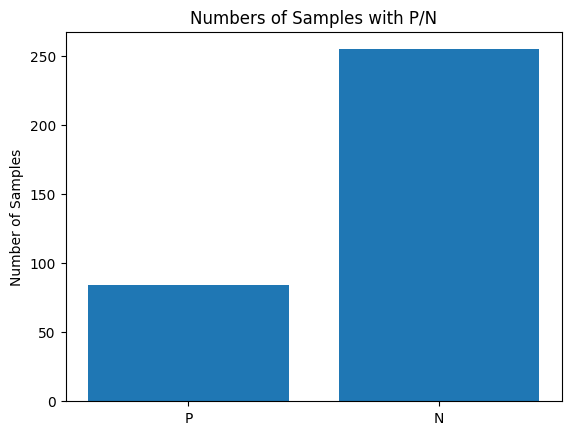

In [15]:
# SOURCE : https://youtu.be/zwSJeIcRFuQ?si=m4lVMrKVyXncqLkY

import matplotlib.pyplot as plt

number_positive_samples = len(positive_samples)
number_negative_samples = len(negative_samples)

graph_positions = range(number_of_target_values)
graph_heights = [number_positive_samples, number_negative_samples]

plt.bar(graph_positions, graph_heights)

plt.xticks(graph_positions, target_values)

plt.title("Numbers of Samples with P/N")

plt.ylabel("Number of Samples")

plt.show()

### Red Wine Quality Dataset

In [16]:
target_feature = red_wine_quality_df.columns[-1]
target_feature

'quality'

In [17]:
red_wine_quality_df[target_feature]

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [18]:
target_values = red_wine_quality_df[target_feature].unique()
number_of_target_values = red_wine_quality_df[target_feature].nunique()

print(target_values)
print(number_of_target_values)

[5 6 7 4 8 3]
6


In [19]:
import numpy as np

# Sort the values in order:
target_values = np.sort(target_values)

# Count the number of samples corresponding to each target value:
for quality in target_values:
  number_of_quality = len(red_wine_quality_df.loc[red_wine_quality_df[target_feature] == quality])
  print(f'Number of samples with quality of {quality} is : {number_of_quality}')

print('--------')

print(f'Total number of samples is : {len(red_wine_quality_df)}')

Number of samples with quality of 3 is : 10
Number of samples with quality of 4 is : 53
Number of samples with quality of 5 is : 681
Number of samples with quality of 6 is : 638
Number of samples with quality of 7 is : 199
Number of samples with quality of 8 is : 18
--------
Total number of samples is : 1599


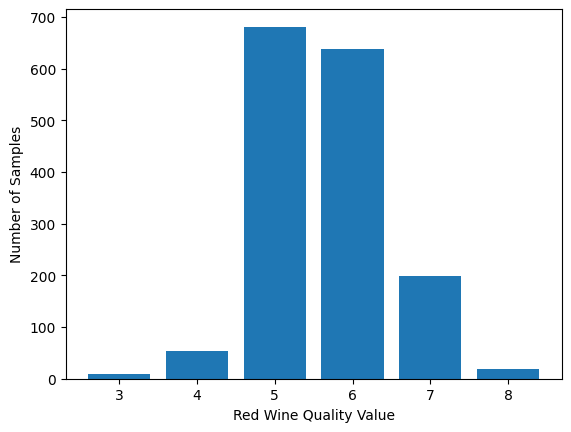

In [20]:
# SOURCE : https://youtu.be/zwSJeIcRFuQ?si=m4lVMrKVyXncqLkY

import matplotlib.pyplot as plt

graph_heights = []
for quality in target_values:
  number_of_quality = len(red_wine_quality_df.loc[red_wine_quality_df[target_feature] == quality])
  graph_heights.append(number_of_quality)

number_of_target_values = len(target_values)

graph_positions = range(number_of_target_values)

plt.bar(graph_positions, graph_heights)

plt.xticks(graph_positions, target_values)

plt.xlabel("Red Wine Quality Value")
plt.ylabel("Number of Samples")

plt.show()

## The Spread of the Datasets

In [21]:
primary_tumor_df['binaryClass'].describe()

count     339
unique      2
top         N
freq      255
Name: binaryClass, dtype: object

In [22]:
red_wine_quality_df['quality'].describe()

count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

## The Skewness of the Datasets

In [23]:
# ERROR occurs when code is run : FIX
# primary_tumor_df['binaryClass'].skew()

In [24]:
red_wine_quality_df['quality'].skew()

0.21780157547366327

In [25]:
red_wine_quality_df['quality'].kurt()

0.2967081197538759

## Missing Values in the Datasets

- Do the datasets contain missing values?
- What can we do about the missing values?

### Do the Datasets Contain Missing Values?

#### Primary Tumor Dataset

In [26]:
primary_tumor_df.isnull().sum()

age                0
sex                0
histologic-type    0
degree-of-diffe    0
bone               0
bone-marrow        0
lung               0
pleura             0
peritoneum         0
liver              0
brain              0
skin               0
neck               0
supraclavicular    0
axillar            0
mediastinum        0
abdominal          0
binaryClass        0
dtype: int64

Notice that, with the method we called, it indicates no missing values; however, the missing values are represented by a '?'

This can be seen by checking the "histologic-type" column.

In [27]:
primary_tumor_df.loc[primary_tumor_df['histologic-type'] == '?']

,age,sex,histologic-type,degree-of-diffe,bone,bone-marrow,lung,pleura,peritoneum,liver,brain,skin,neck,supraclavicular,axillar,mediastinum,abdominal,binaryClass
0,>=60,female,?,?,no,no,no,no,no,yes,no,no,no,no,no,no,no,P
1,>=60,male,?,poorly,no,no,no,no,no,yes,no,no,no,yes,no,yes,no,P
10,>=60,female,?,?,no,no,no,no,yes,yes,no,no,no,yes,no,no,no,P
12,>=60,female,?,?,yes,no,yes,no,no,no,no,no,no,no,no,no,no,N
17,30-59,male,?,poorly,yes,no,no,no,no,yes,no,no,no,no,no,yes,no,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,30-59,male,?,poorly,no,no,no,no,no,no,no,yes,no,no,no,no,no,P
326,30-59,male,?,poorly,no,no,yes,no,yes,yes,no,no,no,no,no,yes,yes,N
327,>=60,male,?,poorly,no,no,no,no,no,yes,no,no,no,no,no,yes,yes,P
328,>=60,male,?,poorly,no,no,no,yes,yes,no,no,no,yes,no,no,yes,yes,N


Let us check for all columns and whether they have missing values.

In [28]:
for column in primary_tumor_df.columns:
  number_missing_values = len(primary_tumor_df.loc[primary_tumor_df[column] == '?'])
  print(f'Missing values for {column} is : {number_missing_values}')

Missing values for age is : 0
Missing values for sex is : 1
Missing values for histologic-type is : 67
Missing values for degree-of-diffe is : 155
Missing values for bone is : 0
Missing values for bone-marrow is : 0
Missing values for lung is : 0
Missing values for pleura is : 0
Missing values for peritoneum is : 0
Missing values for liver is : 0
Missing values for brain is : 0
Missing values for skin is : 1
Missing values for neck is : 0
Missing values for supraclavicular is : 0
Missing values for axillar is : 1
Missing values for mediastinum is : 0
Missing values for abdominal is : 0
Missing values for binaryClass is : 0


What about missing values for each row?

In [29]:
length_df = len(primary_tumor_df)

for row in range(length_df):
  row_array = primary_tumor_df.iloc[row].values
  number_missing_values = (row_array == '?').sum()

  # Print only the rows with missing values:
  if (number_missing_values > 0):
    print(f'Row # : {row} | # of missing values : {number_missing_values} | ')

Row # : 0 | # of missing values : 2 | 
Row # : 1 | # of missing values : 1 | 
Row # : 2 | # of missing values : 1 | 
Row # : 3 | # of missing values : 1 | 
Row # : 4 | # of missing values : 1 | 
Row # : 5 | # of missing values : 1 | 
Row # : 6 | # of missing values : 1 | 
Row # : 7 | # of missing values : 1 | 
Row # : 10 | # of missing values : 2 | 
Row # : 11 | # of missing values : 1 | 
Row # : 12 | # of missing values : 2 | 
Row # : 13 | # of missing values : 1 | 
Row # : 15 | # of missing values : 1 | 
Row # : 17 | # of missing values : 1 | 
Row # : 20 | # of missing values : 1 | 
Row # : 26 | # of missing values : 1 | 
Row # : 30 | # of missing values : 1 | 
Row # : 31 | # of missing values : 1 | 
Row # : 33 | # of missing values : 1 | 
Row # : 35 | # of missing values : 1 | 
Row # : 36 | # of missing values : 1 | 
Row # : 38 | # of missing values : 1 | 
Row # : 39 | # of missing values : 1 | 
Row # : 40 | # of missing values : 1 | 
Row # : 41 | # of missing values : 1 | 
Row # : 

From the comparisons of missing values, between rows and columns, it seems that most rows, with missing values, usually have the columns of **'histologic-type' (67/339 missing values)** & **'degree-of-diffe' (155/339 missing values)** as the missing values.

#### Red Wine Quality Dataset

In [30]:
red_wine_quality_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

The "Red Wine Quality" dataset looks clean in terms of no missing values. You can also verify that it doesn't contain missing values by going to the website where the dataset can be downloaded from.

### What Can We Do About the Missing Values in the "Primary Tumor" Dataset?

Possible Solutions :
- Drop the rows with missing values.
- Drop the columns with the missing values.
- Fill in the missing values with a median/mean value of all the column values.
- A combination of the above solutions?

#### Solution 1 : Drop the Rows with Missing Values

In [31]:
length_df = len(primary_tumor_df)

count_of_rows_with_missing_values = 0

for row in range(length_df):
  row_array = primary_tumor_df.iloc[row].values
  number_missing_values = (row_array == '?').sum()

  # Count the rows with missing values:
  if (number_missing_values > 0):
    count_of_rows_with_missing_values += 1

print(f'The number of rows in the dataset : {length_df}')
print(f'The number of rows with missing values is : {count_of_rows_with_missing_values}')

percentage_removed = (
    float(count_of_rows_with_missing_values) / float(length_df)
) * 100

print(f'Percentage of samples (rows) removed from the dataset is : {percentage_removed} %')

The number of rows in the dataset : 339
The number of rows with missing values is : 207
Percentage of samples (rows) removed from the dataset is : 61.06194690265486 %


Notice here that, if we removed all the rows with missing values, we will be taking about 60% of the samples away from the dataset.

In [32]:
# Implementation of solution : drop rows with missing values.

length_df = len(primary_tumor_df)

rows_to_drop = []
for row in range(length_df):
  row_array = primary_tumor_df.iloc[row].values
  number_missing_values = (row_array == '?').sum()

  # Count the rows with missing values:
  if (number_missing_values > 0):
    rows_to_drop.append(row)


#print(primary_tumor_df.index.values)

print(f'Number of dataset samples before removal of rows with missing values : {primary_tumor_df.shape[0]}')

primary_tumor_df_dropped_rows = primary_tumor_df.drop(
    rows_to_drop,
    axis=0,
)

print(f'Number of dataset samples after removal of rows with missing values : {primary_tumor_df_dropped_rows.shape[0]}')

Number of dataset samples before removal of rows with missing values : 339
Number of dataset samples after removal of rows with missing values : 132


#### Solution 2 : Drop the Columns with Missing Values

In [33]:
columns_with_missing_values = []

for column in primary_tumor_df.columns:
  number_missing_values = len(primary_tumor_df.loc[primary_tumor_df[column] == '?'])

  if number_missing_values > 0:
    columns_with_missing_values.append(column)


print(f'Number of dataset columns before removing columns with missing values : {primary_tumor_df.shape[1]}')

primary_tumor_dropped_columns = primary_tumor_df.drop(
    columns_with_missing_values,
    axis=1,
)

print(f'Number of dataset columns after removing columns with missing values : {primary_tumor_dropped_columns.shape[1]}')

Number of dataset columns before removing columns with missing values : 18
Number of dataset columns after removing columns with missing values : 13


#### Solution 3 : Fill in the missing values with a median/mean value of all the column values

Let us remind ourselves of the columns with the missing values...

In [34]:
for column in primary_tumor_df.columns:
  number_missing_values = len(primary_tumor_df.loc[primary_tumor_df[column] == '?'])
  print(f'Missing values for {column} is : {number_missing_values}')

Missing values for age is : 0
Missing values for sex is : 1
Missing values for histologic-type is : 67
Missing values for degree-of-diffe is : 155
Missing values for bone is : 0
Missing values for bone-marrow is : 0
Missing values for lung is : 0
Missing values for pleura is : 0
Missing values for peritoneum is : 0
Missing values for liver is : 0
Missing values for brain is : 0
Missing values for skin is : 1
Missing values for neck is : 0
Missing values for supraclavicular is : 0
Missing values for axillar is : 1
Missing values for mediastinum is : 0
Missing values for abdominal is : 0
Missing values for binaryClass is : 0


To fill in the missing values with a median/mean, we must see whether the columns are quantitative (numeric) or qualitative (text) and whether a median/mean can be extracted from the columns...

In [35]:
for column in primary_tumor_df.columns:
  number_missing_values = len(primary_tumor_df.loc[primary_tumor_df[column] == '?'])

  if number_missing_values > 0:
    print(f'Column Name : {column}')
    print()
    print(primary_tumor_df[column].value_counts())
    print("--------------------------------------")

Column Name : sex

female    177
male      161
?           1
Name: sex, dtype: int64
--------------------------------------
Column Name : histologic-type

adeno         220
?              67
epidermoid     44
anaplastic      8
Name: histologic-type, dtype: int64
--------------------------------------
Column Name : degree-of-diffe

?         155
poorly    100
well       57
fairly     27
Name: degree-of-diffe, dtype: int64
--------------------------------------
Column Name : skin

no     318
yes     20
?        1
Name: skin, dtype: int64
--------------------------------------
Column Name : axillar

no     305
yes     33
?        1
Name: axillar, dtype: int64
--------------------------------------


From what we can see, all the columns are qualitative.

We can observe that three out of the five columns can be converted from qualitative data into quantitative binary data. From these columns, we can then extract a median/mean; these columns are:
- sex
- skin
- axillar

The "degree-of-diffe" column looks like it can be converted into a qualitative scale, such as:
- 1 : poorly
- 2 : fairly
- 3 : well

The "histologic-type" column, can be converted to qualitative data by mapping each word to a number, similar to the "degree-of-diffe" column.

#### Solution 4 : A combination of the above solutions?

Another solution could be to clean the missing data based on a combination of the three solutions we mentioned above.

The following is an example of a combination:
1. Remove the columns with a big number of missing values (for example >50 missing values)
2. If there are still rows with missing values, drop them or replace the missing values with a median/mean, if applicable.

In [36]:
# Remove the columns with greater than 50 missing values:

columns_with_missing_values = []

for column in primary_tumor_df.columns:
  number_missing_values = len(primary_tumor_df.loc[primary_tumor_df[column] == '?'])

  if number_missing_values > 50:
    columns_with_missing_values.append(column)


print(f'Number of dataset columns before removing columns with missing values : {primary_tumor_df.shape[1]}')

print("--------")
print("Columns to be dropped:")
print(columns_with_missing_values)
print("--------")

primary_tumor_df_dropped_columns = primary_tumor_df.drop(
    columns_with_missing_values,
    axis=1,
)

print(f'Number of dataset columns after removing columns with missing values : {primary_tumor_df_dropped_columns.shape[1]}')

Number of dataset columns before removing columns with missing values : 18
--------
Columns to be dropped:
['histologic-type', 'degree-of-diffe']
--------
Number of dataset columns after removing columns with missing values : 16


In [37]:
length_df = len(primary_tumor_df_dropped_columns)

count_of_rows_with_missing_values = 0

for row in range(length_df):
  row_array = primary_tumor_df_dropped_columns.iloc[row].values
  number_missing_values = (row_array == '?').sum()

  # Count the rows with missing values:
  if (number_missing_values > 0):
    count_of_rows_with_missing_values += 1
    print(f'Row with missing value(s) : {row}')

print()
print(f'The number of rows in the dataset : {length_df}')
print(f'The number of rows with missing values is : {count_of_rows_with_missing_values}')

Row with missing value(s) : 47
Row with missing value(s) : 140
Row with missing value(s) : 287

The number of rows in the dataset : 339
The number of rows with missing values is : 3


There are 3 rows with missing values, now.

Let us check which ones they are:

In [38]:
rows_with_missing_values = [47, 140, 287]
primary_tumor_df_dropped_columns.iloc[rows_with_missing_values]

,age,sex,bone,bone-marrow,lung,pleura,peritoneum,liver,brain,skin,neck,supraclavicular,axillar,mediastinum,abdominal,binaryClass
47,30-59,male,yes,no,no,no,no,no,no,?,yes,yes,no,no,no,P
140,30-59,male,no,no,no,no,no,no,no,no,no,yes,?,yes,no,P
287,30-59,?,no,no,no,no,no,no,no,no,no,no,no,yes,no,N


The simplest solution, since there are only 3 rows with missing values, is to just remove them.

To my knowledge, removing 3 samples should not have a big effect, when later building a machine learning model.

In [39]:
primary_tumor_df_dropped_columns = primary_tumor_df_dropped_columns.drop(
    rows_with_missing_values,
    axis=0,
)

# The rows should be dropped from 339 to 336:
primary_tumor_df_dropped_columns.shape

(336, 16)

The advantage of the 4th solution is that it removes all the missing values without removing too much of the dataset.

Could it be improved? Most definitely. We saw that we removed two potentially-valuable columns from the dataset, which may remove valuable insights into the dataset; however, those columns contained alot of empty data so it is unknown whether they would have provided much difference, if kept.

## Bivariate Data Analysis

### Correlation

What relationship can we see between the feature columns and the target column?



#### Primary Tumor Dataset

- Remove any missing values from columns, but keep the columns (instead of removing the columns).
- Since the "Primary Tumor" dataset is not numeric, convert the qualitative data into quantitative data.

##### Age Column

In [40]:
primary_tumor_df['age'].value_counts()

30-59    209
>=60     107
<30       23
Name: age, dtype: int64

In [41]:
replacement = {
        "<30" : 0,
        "30-59" : 1,
        ">=60" : 2,
}

df_copy = primary_tumor_df.replace(
    replacement,
)

df_copy["age"].head()

0    2
1    2
2    1
3    1
4    1
Name: age, dtype: int64

Check the correlation between the age column and the target column...

In [42]:
target_replacement = {
    "N" : 0,
    "P" : 1,
}

df_copy = df_copy.replace(
    target_replacement,
)

df_copy['binaryClass'].head()

0    1
1    1
2    0
3    0
4    0
Name: binaryClass, dtype: int64

In [43]:
from scipy import stats

corr, p_value = stats.spearmanr(
    df_copy['age'],
    df_copy['binaryClass']
)

corr

-0.07383955985771665

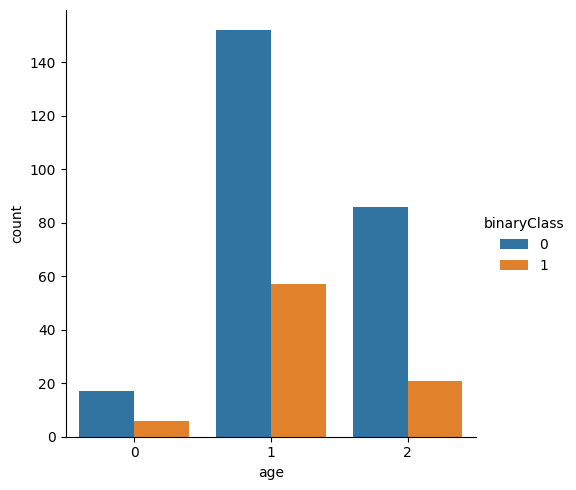

In [44]:
# https://stats.stackexchange.com/questions/520731/how-to-plot-binary-vs-categorical-nominal-data

import seaborn as sns

sns.catplot(data=df_copy, x="age", hue="binaryClass", kind='count')

##### Sex Column

In [45]:
primary_tumor_df['sex'].value_counts()

female    177
male      161
?           1
Name: sex, dtype: int64

In [46]:
replacement = {
        "female" : 0,
        "male" : 1,
}

df_copy = primary_tumor_df.replace(
    replacement,
)

df_copy["sex"].head()

0    0
1    1
2    0
3    0
4    0
Name: sex, dtype: object

Keep in mind the missing values...

In [47]:
df_copy['sex'].loc[
    df_copy['sex'] == "?"
]

287    ?
Name: sex, dtype: object

In [48]:
# Drop the row, with the missing value, from the column:
row_to_be_dropped = df_copy['sex'].loc[
    df_copy['sex'] == "?"
].index[0]


df_copy = df_copy.drop(
    row_to_be_dropped,
    axis=0,
)

df_copy['sex'].value_counts()

0    177
1    161
Name: sex, dtype: int64

In [49]:
target_replacement = {
    "N" : 0,
    "P" : 1,
}

df_copy = df_copy.replace(
    target_replacement,
)

df_copy['binaryClass'].head()

0    1
1    1
2    0
3    0
4    0
Name: binaryClass, dtype: int64

In [50]:
from scipy import stats

corr, p_value = stats.spearmanr(
    df_copy['sex'],
    df_copy['binaryClass']
)

corr

0.20545140374279733

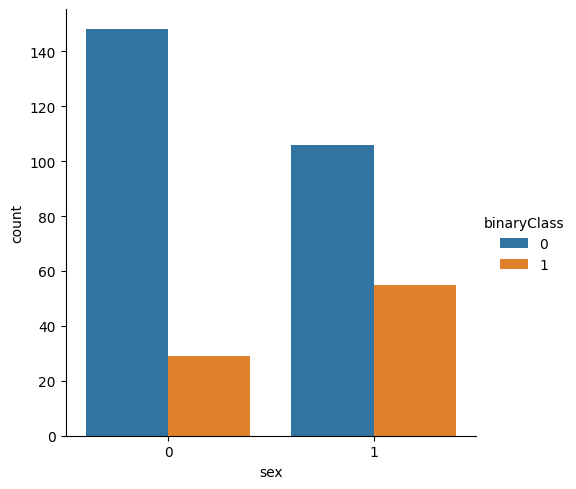

In [51]:
import seaborn as sns

sns.catplot(data=df_copy, x="sex", hue="binaryClass", kind='count')

##### Histologic-Type Column

In [52]:
primary_tumor_df['histologic-type'].value_counts()

adeno         220
?              67
epidermoid     44
anaplastic      8
Name: histologic-type, dtype: int64

In [53]:
rows_to_be_dropped = primary_tumor_df['histologic-type'].loc[
    primary_tumor_df['histologic-type'] == "?"
].index

In [54]:
rows_to_be_dropped

Int64Index([  0,   1,  10,  12,  17,  31,  39,  40,  44,  53,  55,  56,  59,
             60,  61,  62,  74,  77,  80,  82,  86,  95,  97, 101, 108, 111,
            113, 128, 129, 133, 143, 148, 160, 161, 168, 171, 173, 182, 192,
            196, 201, 205, 209, 218, 219, 221, 223, 230, 238, 243, 244, 248,
            252, 256, 261, 268, 269, 285, 287, 293, 305, 309, 310, 326, 327,
            328, 332],
           dtype='int64')

In [55]:
df_copy = primary_tumor_df.drop(
    rows_to_be_dropped,
    axis=0,
)

df_copy['histologic-type'].value_counts()

adeno         220
epidermoid     44
anaplastic      8
Name: histologic-type, dtype: int64

In [56]:
replacement = {
    "adeno" : 0,
    "anaplastic" : 1,
    "epidermoid" : 2,
}

df_copy = df_copy.replace(
    replacement,
)

df_copy['histologic-type'].head()

2    0
3    0
4    0
5    0
6    0
Name: histologic-type, dtype: int64

In [57]:
target_replacement = {
    "N" : 0,
    "P" : 1,
}

df_copy = df_copy.replace(
    target_replacement,
)

df_copy['binaryClass'].head()

2    0
3    0
4    0
5    0
6    0
Name: binaryClass, dtype: int64

In [58]:
from scipy import stats

corr, p_value = stats.spearmanr(
    df_copy['histologic-type'],
    df_copy['binaryClass']
)

corr

0.4183755281722026

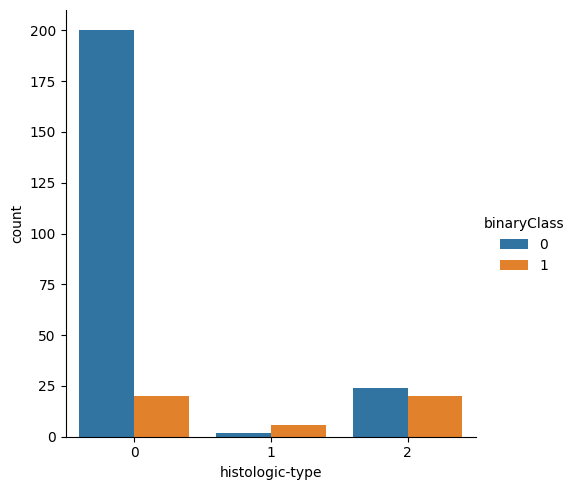

In [59]:
import seaborn as sns

sns.catplot(data=df_copy, x="histologic-type", hue="binaryClass", kind='count')

##### Degree-of-diffe Column

In [60]:
primary_tumor_df['degree-of-diffe'].value_counts()

?         155
poorly    100
well       57
fairly     27
Name: degree-of-diffe, dtype: int64

In [61]:
rows_to_be_dropped = primary_tumor_df['degree-of-diffe'].loc[
    primary_tumor_df['degree-of-diffe'] == "?"
].index

In [62]:
rows_to_be_dropped

Int64Index([  0,   2,   3,   4,   5,   6,   7,  10,  11,  12,
            ...
            308, 309, 311, 314, 315, 320, 324, 329, 330, 337],
           dtype='int64', length=155)

In [63]:
df_copy = primary_tumor_df.drop(
    rows_to_be_dropped,
    axis=0,
)

df_copy['degree-of-diffe'].value_counts()

poorly    100
well       57
fairly     27
Name: degree-of-diffe, dtype: int64

In [64]:
replacement = {
    "poorly" : 0,
    "fairly" : 1,
    "well" : 2,
}

df_copy = df_copy.replace(
    replacement,
)

df_copy['degree-of-diffe'].head()

1     0
8     1
9     2
14    2
16    0
Name: degree-of-diffe, dtype: int64

In [65]:
target_replacement = {
    "N" : 0,
    "P" : 1,
}

df_copy = df_copy.replace(
    target_replacement,
)

df_copy['binaryClass'].head()

1     1
8     0
9     0
14    1
16    1
Name: binaryClass, dtype: int64

In [66]:
from scipy import stats

corr, p_value = stats.spearmanr(
    df_copy['degree-of-diffe'],
    df_copy['binaryClass']
)

corr

-0.46290476056241986

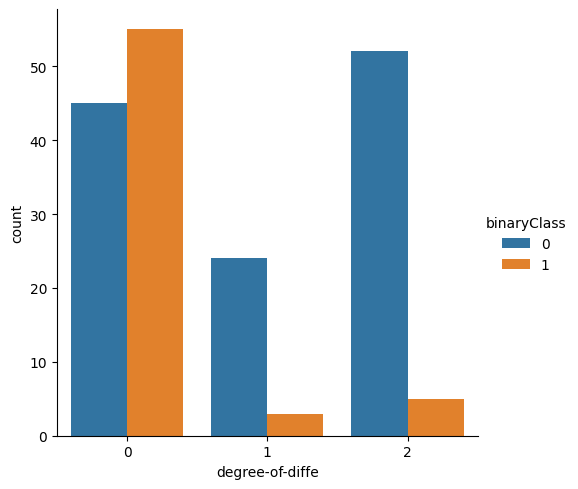

In [67]:
import seaborn as sns

sns.catplot(data=df_copy, x="degree-of-diffe", hue="binaryClass", kind='count')

##### Bone Column


In [68]:
primary_tumor_df['bone'].value_counts()

no     245
yes     94
Name: bone, dtype: int64

In [69]:
replacement = {
        "no" : 0,
        "yes" : 1,
}

df_copy = primary_tumor_df.replace(
    replacement,
)

df_copy["bone"].head()

0    0
1    0
2    0
3    0
4    0
Name: bone, dtype: int64

In [70]:
target_replacement = {
    "N" : 0,
    "P" : 1,
}

df_copy = df_copy.replace(
    target_replacement,
)

df_copy['binaryClass'].head()

0    1
1    1
2    0
3    0
4    0
Name: binaryClass, dtype: int64

In [71]:
from scipy import stats

corr, p_value = stats.spearmanr(
    df_copy['bone'],
    df_copy['binaryClass']
)

corr

0.14817371856492792

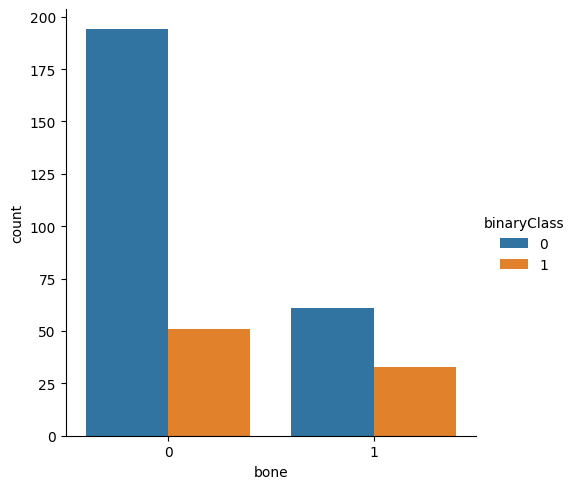

In [72]:
import seaborn as sns

sns.catplot(data=df_copy, x="bone", hue="binaryClass", kind='count')

##### Bone-Marrow Column

In [73]:
primary_tumor_df['bone-marrow'].value_counts()

no     332
yes      7
Name: bone-marrow, dtype: int64

In [74]:
replacement = {
        "no" : 0,
        "yes" : 1,
}

df_copy = primary_tumor_df.replace(
    replacement,
)

df_copy["bone-marrow"].head()

0    0
1    0
2    0
3    0
4    0
Name: bone-marrow, dtype: int64

In [75]:
target_replacement = {
    "N" : 0,
    "P" : 1,
}

df_copy = df_copy.replace(
    target_replacement,
)

df_copy['binaryClass'].head()

0    1
1    1
2    0
3    0
4    0
Name: binaryClass, dtype: int64

In [76]:
from scipy import stats

corr, p_value = stats.spearmanr(
    df_copy['bone-marrow'],
    df_copy['binaryClass']
)

corr

0.060803628527707196

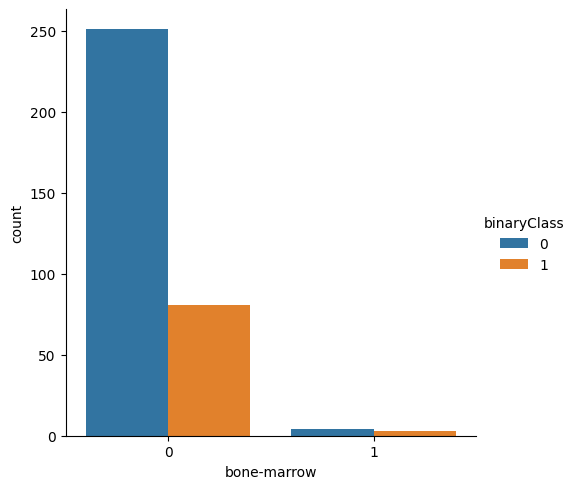

In [77]:
import seaborn as sns

sns.catplot(data=df_copy, x="bone-marrow", hue="binaryClass", kind='count')

##### Lung Column

In [78]:
primary_tumor_df['lung'].value_counts()

no     264
yes     75
Name: lung, dtype: int64

In [79]:
replacement = {
        "no" : 0,
        "yes" : 1,
}

df_copy = primary_tumor_df.replace(
    replacement,
)

df_copy["lung"].head()

0    0
1    0
2    0
3    0
4    0
Name: lung, dtype: int64

In [80]:
target_replacement = {
    "N" : 0,
    "P" : 1,
}

df_copy.replace(
    target_replacement,
    inplace=True,
)

df_copy['binaryClass'].head()

0    1
1    1
2    0
3    0
4    0
Name: binaryClass, dtype: int64

In [81]:
from scipy import stats

corr, p_value = stats.spearmanr(
    df_copy['lung'],
    df_copy['binaryClass']
)

corr

-0.04253650249665764

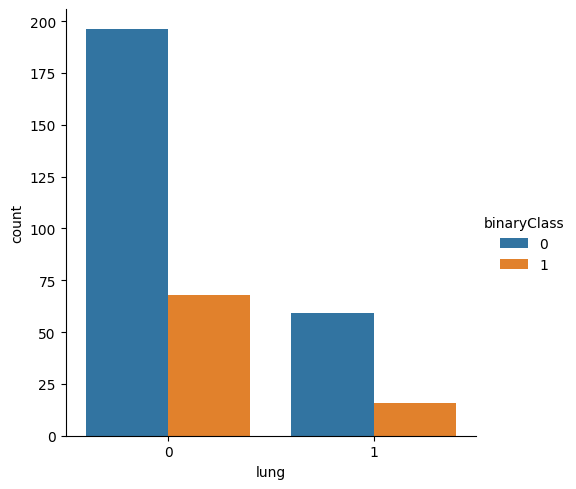

In [82]:
import seaborn as sns

sns.catplot(data=df_copy, x="lung", hue="binaryClass", kind='count')

##### Pleura Column

In [83]:
primary_tumor_df['pleura'].value_counts()

no     264
yes     75
Name: pleura, dtype: int64

In [84]:
replacement = {
        "no" : 0,
        "yes" : 1,
}

df_copy = primary_tumor_df.replace(
    replacement,
)

df_copy["pleura"].head()

0    0
1    0
2    1
3    0
4    1
Name: pleura, dtype: int64

In [85]:
target_replacement = {
    "N" : 0,
    "P" : 1,
}

df_copy.replace(
    target_replacement,
    inplace=True,
)

df_copy['binaryClass'].head()

0    1
1    1
2    0
3    0
4    0
Name: binaryClass, dtype: int64

In [86]:
from scipy import stats

corr, p_value = stats.spearmanr(
    df_copy['pleura'],
    df_copy['binaryClass']
)

corr

0.08915184769847426

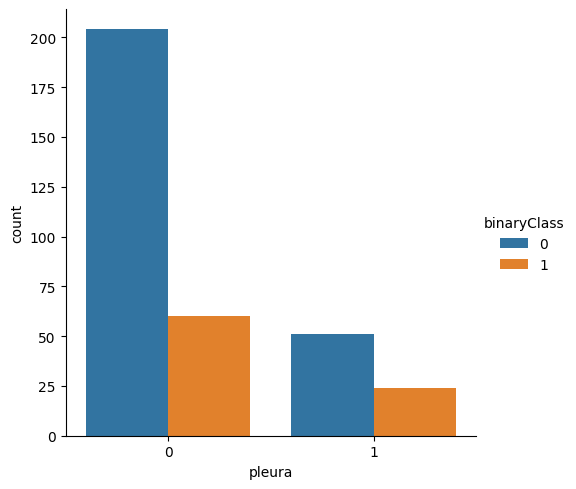

In [87]:
import seaborn as sns

sns.catplot(data=df_copy, x="pleura", hue="binaryClass", kind='count')

##### Peritoneum Column

In [88]:
primary_tumor_df['peritoneum'].value_counts()

no     244
yes     95
Name: peritoneum, dtype: int64

In [89]:
replacement = {
        "no" : 0,
        "yes" : 1,
}

df_copy = primary_tumor_df.replace(
    replacement,
)

df_copy["peritoneum"].head()

0    0
1    0
2    0
3    1
4    1
Name: peritoneum, dtype: int64

In [90]:
target_replacement = {
    "N" : 0,
    "P" : 1,
}

df_copy.replace(
    target_replacement,
    inplace=True,
)

df_copy['binaryClass'].head()

0    1
1    1
2    0
3    0
4    0
Name: binaryClass, dtype: int64

In [91]:
from scipy import stats

corr, p_value = stats.spearmanr(
    df_copy['peritoneum'],
    df_copy['binaryClass']
)

corr

-0.14513547095105156

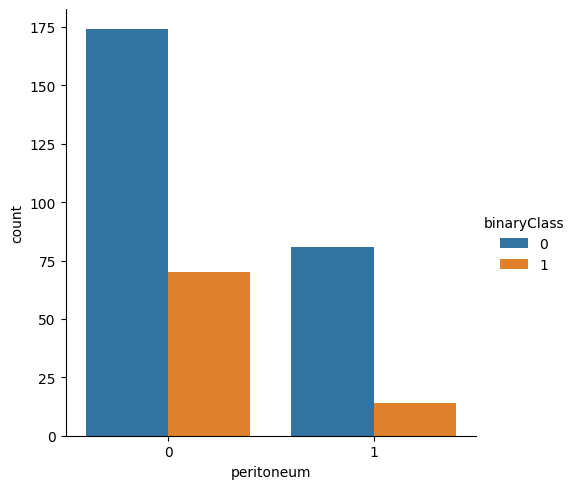

In [92]:
import seaborn as sns

sns.catplot(data=df_copy, x="peritoneum", hue="binaryClass", kind='count')

##### Liver Column

In [93]:
primary_tumor_df['liver'].value_counts()

no     230
yes    109
Name: liver, dtype: int64

In [94]:
replacement = {
        "no" : 0,
        "yes" : 1,
}

df_copy = primary_tumor_df.replace(
    replacement,
)

df_copy["liver"].head()

0    1
1    1
2    0
3    0
4    0
Name: liver, dtype: int64

In [95]:
target_replacement = {
    "N" : 0,
    "P" : 1,
}

df_copy.replace(
    target_replacement,
    inplace=True,
)

df_copy['binaryClass'].head()

0    1
1    1
2    0
3    0
4    0
Name: binaryClass, dtype: int64

In [96]:
from scipy import stats

corr, p_value = stats.spearmanr(
    df_copy['liver'],
    df_copy['binaryClass']
)

corr

0.029128416283004763

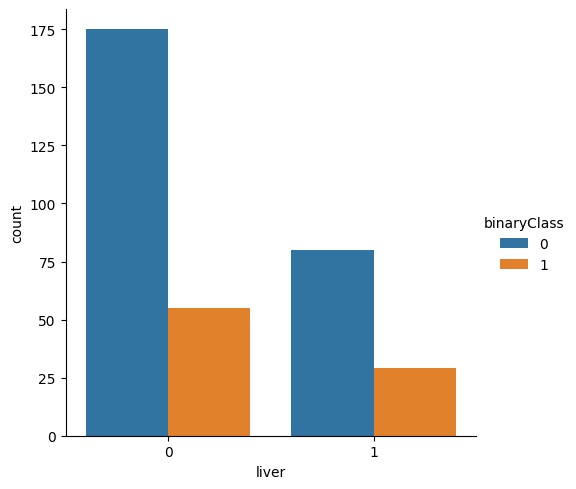

In [97]:
import seaborn as sns

sns.catplot(data=df_copy, x="liver", hue="binaryClass", kind='count')

##### Brain Column

In [98]:
primary_tumor_df['brain'].value_counts()

no     318
yes     21
Name: brain, dtype: int64

In [99]:
replacement = {
        "no" : 0,
        "yes" : 1,
}

df_copy = primary_tumor_df.replace(
    replacement,
)

df_copy["brain"].head()

0    0
1    0
2    0
3    0
4    0
Name: brain, dtype: int64

In [100]:
target_replacement = {
    "N" : 0,
    "P" : 1,
}

df_copy.replace(
    target_replacement,
    inplace=True,
)

df_copy['binaryClass'].head()

0    1
1    1
2    0
3    0
4    0
Name: binaryClass, dtype: int64

In [101]:
from scipy import stats

corr, p_value = stats.spearmanr(
    df_copy['brain'],
    df_copy['binaryClass']
)

corr

0.22098572603032093

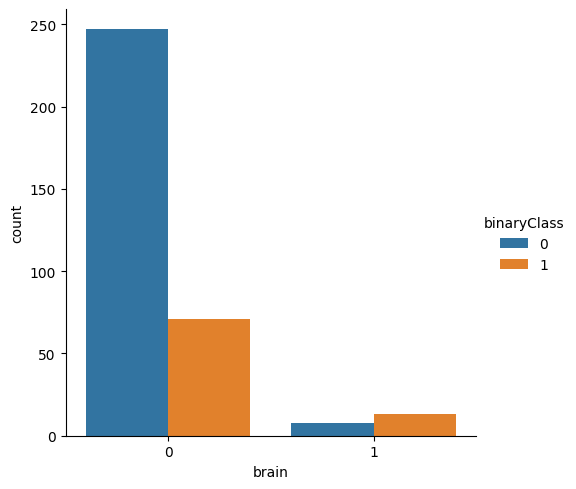

In [102]:
import seaborn as sns

sns.catplot(data=df_copy, x="brain", hue="binaryClass", kind='count')

##### Skin Column

In [103]:
primary_tumor_df['skin'].value_counts()

no     318
yes     20
?        1
Name: skin, dtype: int64

In [104]:
rows_to_be_dropped = primary_tumor_df['skin'].loc[
    primary_tumor_df['skin'] == "?"
].index

In [105]:
rows_to_be_dropped

Int64Index([47], dtype='int64')

In [106]:
df_copy = primary_tumor_df.drop(
    rows_to_be_dropped,
    axis=0,
)

df_copy['skin'].value_counts()

no     318
yes     20
Name: skin, dtype: int64

In [107]:
replacement = {
        "no" : 0,
        "yes" : 1,
}

df_copy.replace(
    replacement,
    inplace=True,
)

df_copy["skin"].head()

0    0
1    0
2    1
3    0
4    0
Name: skin, dtype: int64

In [108]:
target_replacement = {
    "N" : 0,
    "P" : 1,
}

df_copy.replace(
    target_replacement,
    inplace=True,
)

df_copy['binaryClass'].head()

0    1
1    1
2    0
3    0
4    0
Name: binaryClass, dtype: int64

In [109]:
from scipy import stats

corr, p_value = stats.spearmanr(
    df_copy['skin'],
    df_copy['binaryClass']
)

corr

0.14824865186024297

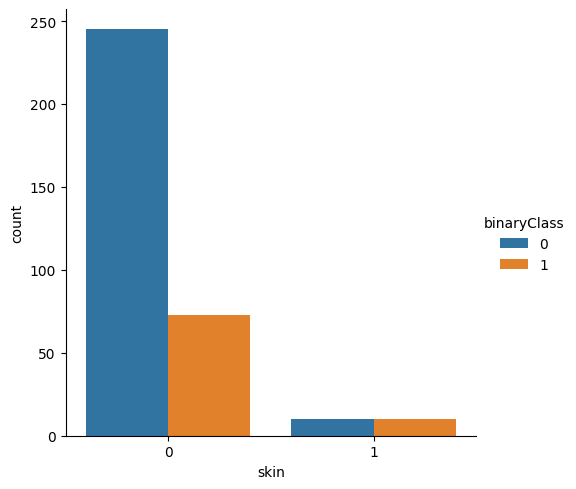

In [110]:
import seaborn as sns

sns.catplot(data=df_copy, x="skin", hue="binaryClass", kind='count')

##### Neck Column

In [111]:
primary_tumor_df['neck'].value_counts()

no     295
yes     44
Name: neck, dtype: int64

In [112]:
replacement = {
        "no" : 0,
        "yes" : 1,
}

df_copy = primary_tumor_df.replace(
    replacement,
)

df_copy["neck"].head()

0    0
1    0
2    0
3    0
4    0
Name: neck, dtype: int64

In [113]:
target_replacement = {
    "N" : 0,
    "P" : 1,
}

df_copy.replace(
    target_replacement,
    inplace=True,
)

df_copy['binaryClass'].head()

0    1
1    1
2    0
3    0
4    0
Name: binaryClass, dtype: int64

In [114]:
from scipy import stats

corr, p_value = stats.spearmanr(
    df_copy['neck'],
    df_copy['binaryClass']
)

corr

-0.09967447112587317

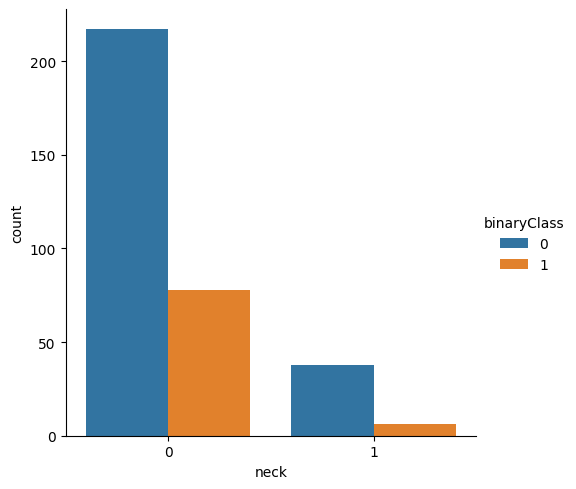

In [115]:
import seaborn as sns

sns.catplot(data=df_copy, x="neck", hue="binaryClass", kind='count')

##### Supraclavicular Column

In [116]:
primary_tumor_df['supraclavicular'].value_counts()

no     278
yes     61
Name: supraclavicular, dtype: int64

In [117]:
replacement = {
        "no" : 0,
        "yes" : 1,
}

df_copy = primary_tumor_df.replace(
    replacement,
)

df_copy["supraclavicular"].head()

0    0
1    1
2    0
3    0
4    0
Name: supraclavicular, dtype: int64

In [118]:
target_replacement = {
    "N" : 0,
    "P" : 1,
}

df_copy.replace(
    target_replacement,
    inplace=True,
)

df_copy['binaryClass'].head()

0    1
1    1
2    0
3    0
4    0
Name: binaryClass, dtype: int64

In [119]:
from scipy import stats

corr, p_value = stats.spearmanr(
    df_copy['supraclavicular'],
    df_copy['binaryClass']
)

corr

0.15803668774165744

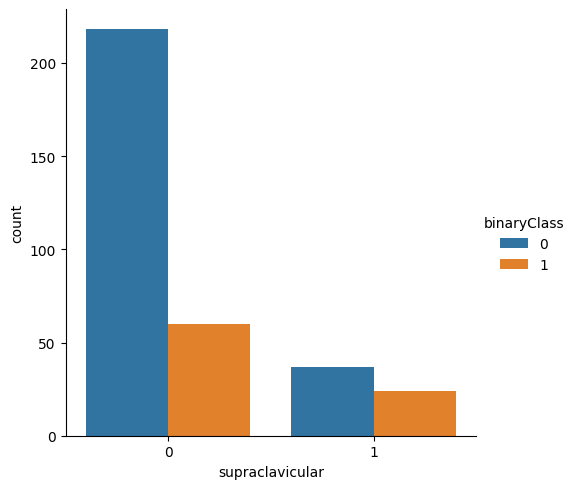

In [120]:
import seaborn as sns

sns.catplot(data=df_copy, x="supraclavicular", hue="binaryClass", kind='count')

##### Axillar Column

In [121]:
primary_tumor_df['axillar'].value_counts()

no     305
yes     33
?        1
Name: axillar, dtype: int64

In [122]:
rows_to_be_dropped = primary_tumor_df['axillar'].loc[
    primary_tumor_df['axillar'] == "?"
].index

rows_to_be_dropped

Int64Index([140], dtype='int64')

In [123]:
df_copy = primary_tumor_df.drop(
    rows_to_be_dropped,
    axis=0,
)

df_copy['axillar'].value_counts()

no     305
yes     33
Name: axillar, dtype: int64

In [124]:
replacement = {
        "no" : 0,
        "yes" : 1,
}

df_copy.replace(
    replacement,
    inplace=True,
)

df_copy["axillar"].head()

0    0
1    0
2    1
3    0
4    0
Name: axillar, dtype: int64

In [125]:
target_replacement = {
    "N" : 0,
    "P" : 1,
}

df_copy.replace(
    target_replacement,
    inplace=True,
)

df_copy['binaryClass'].head()

0    1
1    1
2    0
3    0
4    0
Name: binaryClass, dtype: int64

In [126]:
from scipy import stats

corr, p_value = stats.spearmanr(
    df_copy['axillar'],
    df_copy['binaryClass']
)

corr

-0.07187195563687783

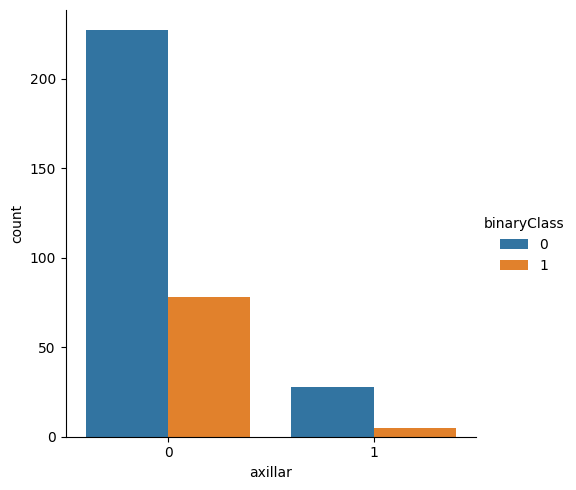

In [127]:
import seaborn as sns

sns.catplot(data=df_copy, x="axillar", hue="binaryClass", kind='count')

##### Mediastinum Column

In [128]:
primary_tumor_df['mediastinum'].value_counts()

no     247
yes     92
Name: mediastinum, dtype: int64

In [129]:
replacement = {
        "no" : 0,
        "yes" : 1,
}

df_copy = primary_tumor_df.replace(
    replacement,
)

df_copy["mediastinum"].head()

0    0
1    1
2    0
3    0
4    0
Name: mediastinum, dtype: int64

In [130]:
target_replacement = {
    "N" : 0,
    "P" : 1,
}

df_copy.replace(
    target_replacement,
    inplace=True,
)

df_copy['binaryClass'].head()

0    1
1    1
2    0
3    0
4    0
Name: binaryClass, dtype: int64

In [131]:
from scipy import stats

corr, p_value = stats.spearmanr(
    df_copy['mediastinum'],
    df_copy['binaryClass']
)

corr

0.44872789801955415

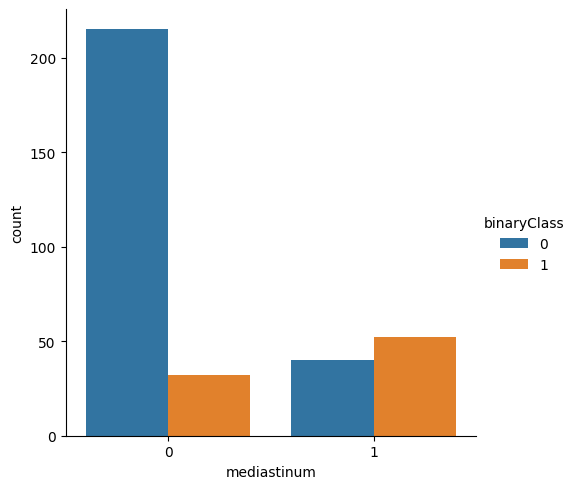

In [132]:
import seaborn as sns

sns.catplot(data=df_copy, x="mediastinum", hue="binaryClass", kind='count')

##### Abdominal Column

In [133]:
primary_tumor_df['abdominal'].value_counts()

no     224
yes    115
Name: abdominal, dtype: int64

In [134]:
replacement = {
        "no" : 0,
        "yes" : 1,
}

df_copy = primary_tumor_df.replace(
    replacement,
)

df_copy["abdominal"].head()

0    0
1    0
2    0
3    0
4    0
Name: abdominal, dtype: int64

In [135]:
target_replacement = {
    "N" : 0,
    "P" : 1,
}

df_copy.replace(
    target_replacement,
    inplace=True,
)

df_copy['binaryClass'].head()

0    1
1    1
2    0
3    0
4    0
Name: binaryClass, dtype: int64

In [136]:
from scipy import stats

corr, p_value = stats.spearmanr(
    df_copy['abdominal'],
    df_copy['binaryClass']
)

corr

-0.10817377915263793

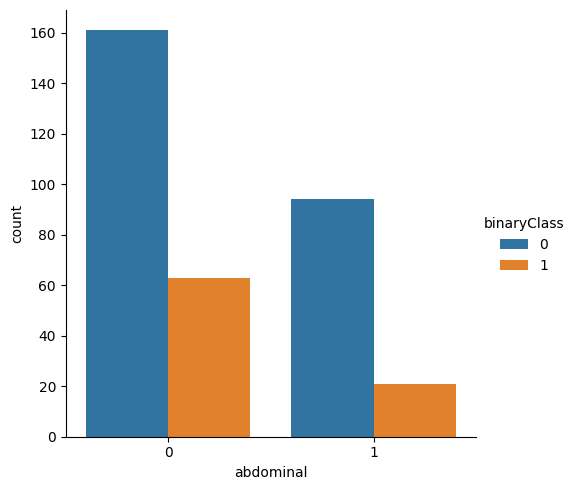

In [137]:
import seaborn as sns

sns.catplot(data=df_copy, x="abdominal", hue="binaryClass", kind='count')

#### Red Wine Quality Dataset

Since the "Red Wine Quality" dataset is already numeric, we can check the correlations, straight-forwardly.

In [138]:
red_wine_quality_df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


##### Fixed Acidity Column

In [139]:
red_wine_quality_df.corr()['fixed acidity']['quality']

0.12405164911322257

<Axes: xlabel='quality', ylabel='fixed acidity'>

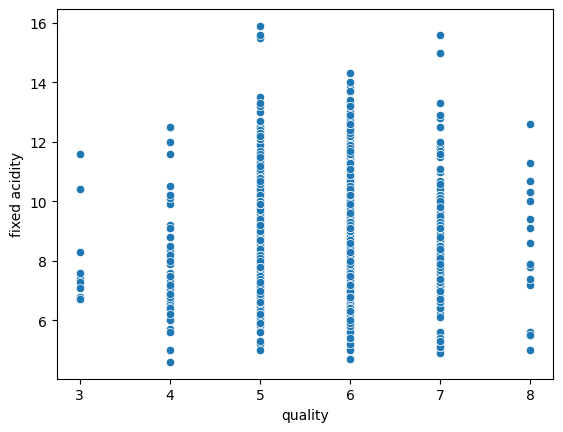

In [140]:
import seaborn as sns

sns.scatterplot(data=red_wine_quality_df, x="quality", y="fixed acidity")

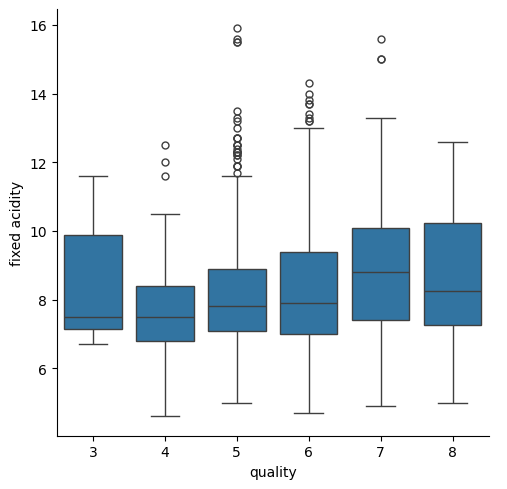

In [141]:
import seaborn as sns

sns.catplot(data=red_wine_quality_df, x="quality", y="fixed acidity", kind='box')

##### Volatile Acidity Column

In [142]:
red_wine_quality_df.corr()['volatile acidity']['quality']

-0.390557780264006

<Axes: xlabel='quality', ylabel='volatile acidity'>

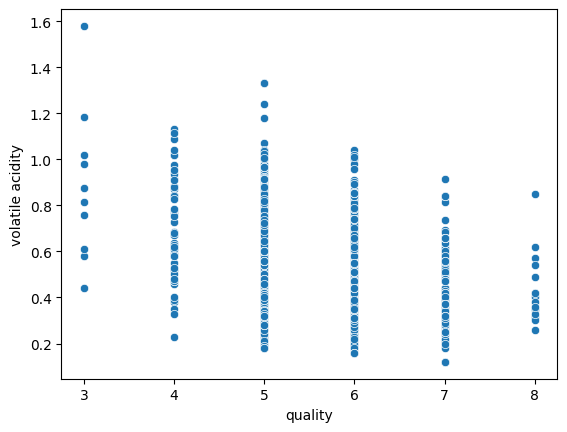

In [143]:
import seaborn as sns

sns.scatterplot(data=red_wine_quality_df, x="quality", y="volatile acidity")

<Axes: xlabel='volatile acidity', ylabel='quality'>

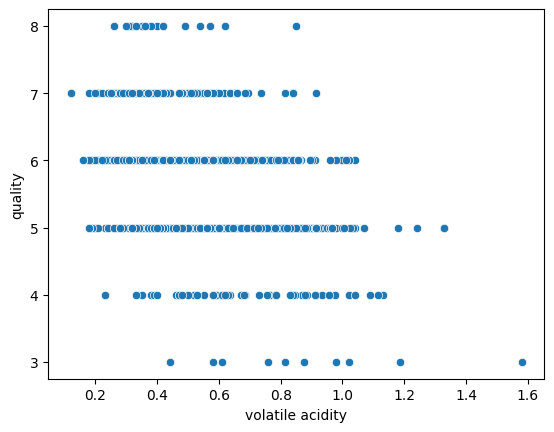

In [144]:
import seaborn as sns

sns.scatterplot(data=red_wine_quality_df, x="volatile acidity", y="quality")

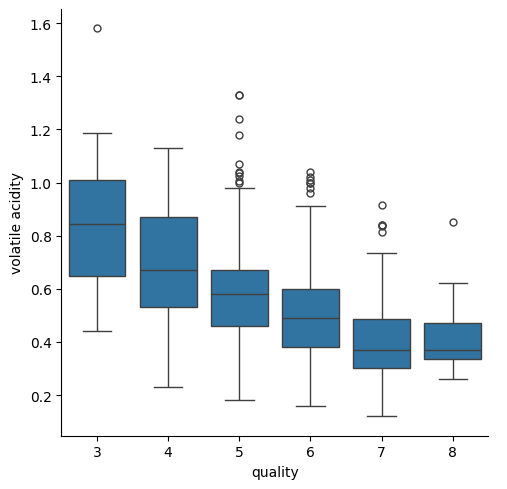

In [145]:
import seaborn as sns

sns.catplot(data=red_wine_quality_df, x="quality", y="volatile acidity", kind='box')

##### Citric Acid Column


In [146]:
red_wine_quality_df.corr()['citric acid']['quality']

0.22637251431804045

<Axes: xlabel='quality', ylabel='citric acid'>

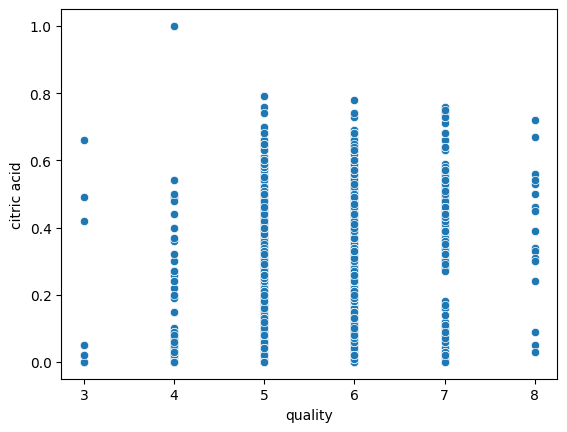

In [147]:
import seaborn as sns

sns.scatterplot(data=red_wine_quality_df, x="quality", y="citric acid")

<Axes: xlabel='citric acid', ylabel='quality'>

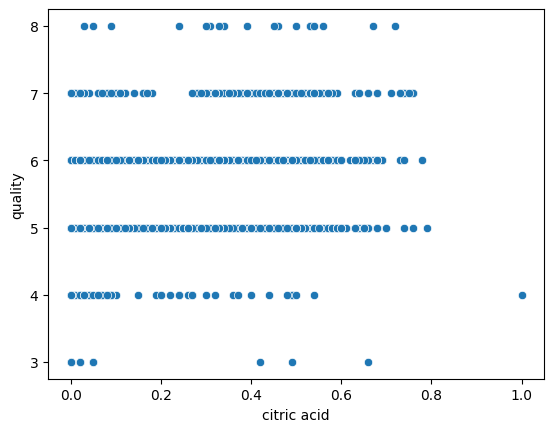

In [148]:
import seaborn as sns

sns.scatterplot(data=red_wine_quality_df, y="quality", x="citric acid")

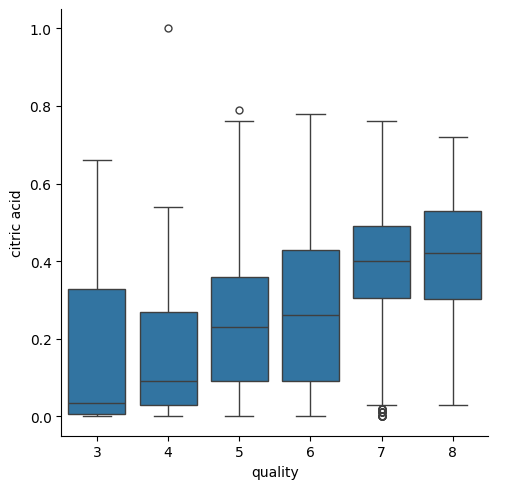

In [149]:
import seaborn as sns

sns.catplot(data=red_wine_quality_df, x="quality", y="citric acid", kind='box')

##### Residual Sugar Column

In [150]:
red_wine_quality_df.corr()['residual sugar']['quality']

0.013731637340065779

<Axes: xlabel='quality', ylabel='residual sugar'>

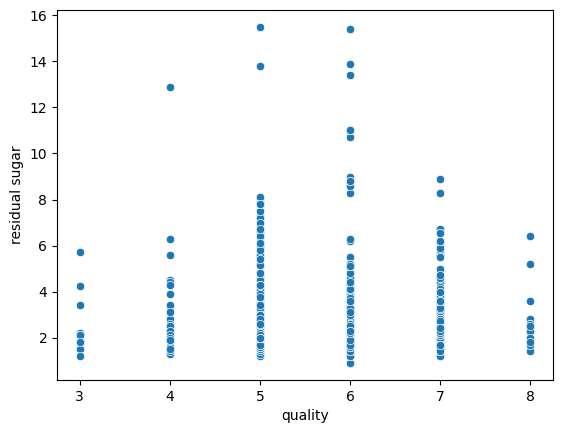

In [151]:
import seaborn as sns

sns.scatterplot(data=red_wine_quality_df, x="quality", y="residual sugar")

<Axes: xlabel='residual sugar', ylabel='quality'>

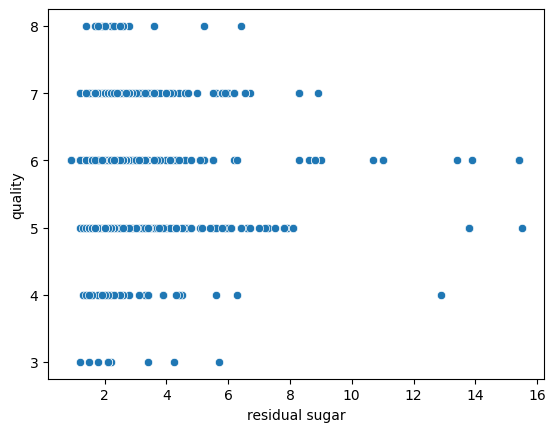

In [152]:
import seaborn as sns

sns.scatterplot(data=red_wine_quality_df, y="quality", x="residual sugar")

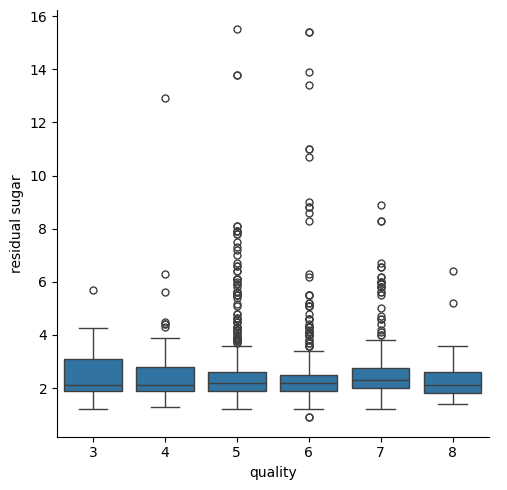

In [153]:
import seaborn as sns

sns.catplot(data=red_wine_quality_df, x="quality", y="residual sugar", kind='box')

##### Chlorides Column

In [154]:
red_wine_quality_df.corr()['chlorides']['quality']

-0.12890655993005293

<Axes: xlabel='quality', ylabel='chlorides'>

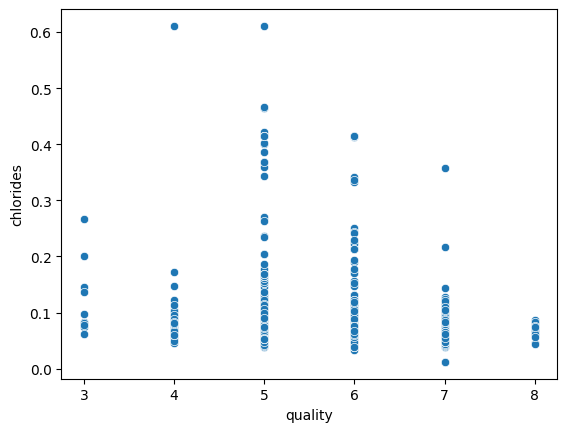

In [155]:
import seaborn as sns

sns.scatterplot(data=red_wine_quality_df, x="quality", y="chlorides")

<Axes: xlabel='chlorides', ylabel='quality'>

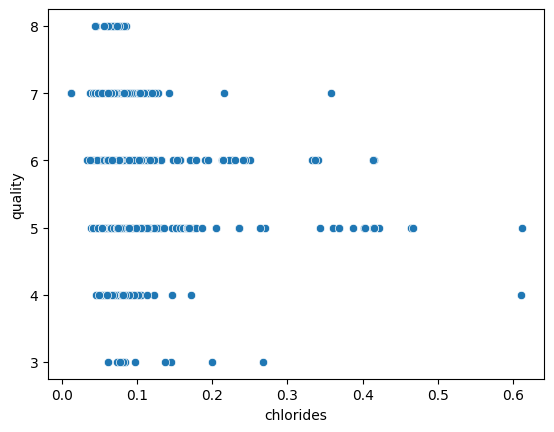

In [156]:
import seaborn as sns

sns.scatterplot(data=red_wine_quality_df, y="quality", x="chlorides")

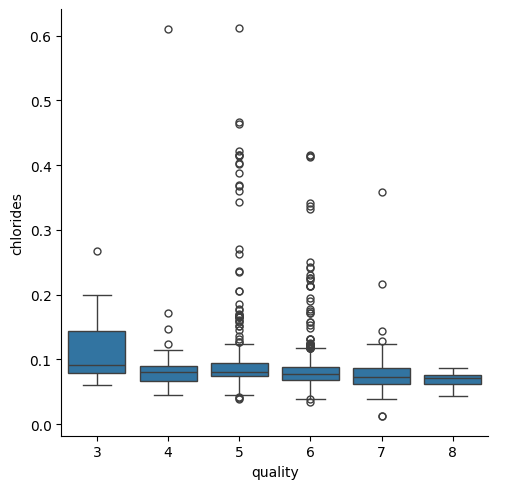

In [157]:
import seaborn as sns

sns.catplot(data=red_wine_quality_df, x="quality", y="chlorides", kind='box')

##### Free Sulfur Dioxide Column

In [158]:
red_wine_quality_df.corr()['free sulfur dioxide']['quality']

-0.05065605724427594

<Axes: xlabel='quality', ylabel='free sulfur dioxide'>

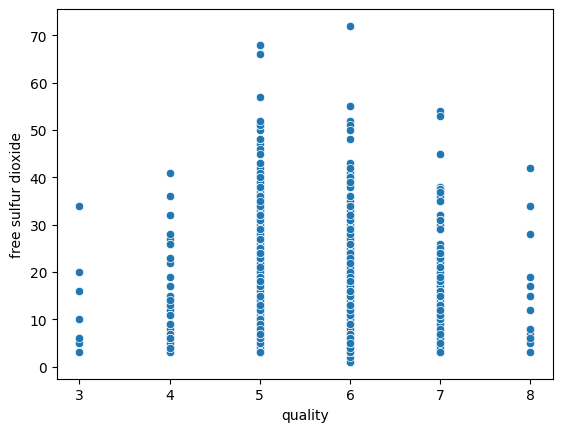

In [159]:
import seaborn as sns

sns.scatterplot(data=red_wine_quality_df, x="quality", y="free sulfur dioxide")

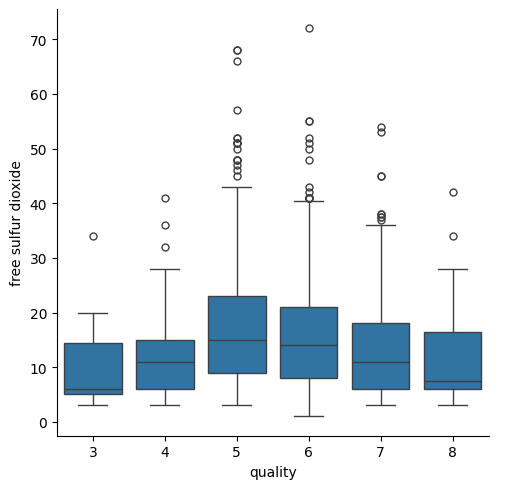

In [160]:
import seaborn as sns

sns.catplot(data=red_wine_quality_df, x="quality", y="free sulfur dioxide", kind='box')

##### Total Sulfur Dioxide Column

In [161]:
red_wine_quality_df.corr()['total sulfur dioxide']['quality']

-0.1851002889265377

<Axes: xlabel='quality', ylabel='total sulfur dioxide'>

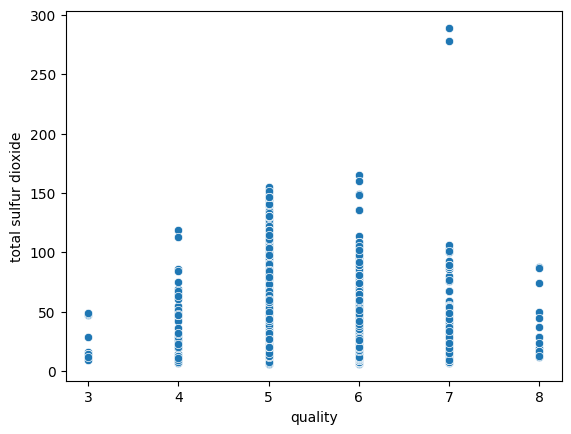

In [162]:
import seaborn as sns

sns.scatterplot(data=red_wine_quality_df, x="quality", y="total sulfur dioxide")

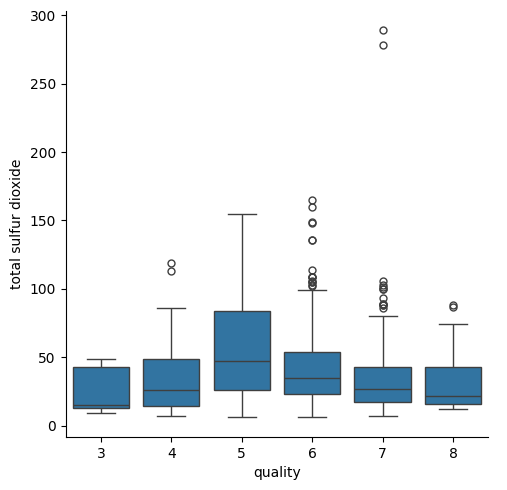

In [163]:
import seaborn as sns

sns.catplot(data=red_wine_quality_df, x="quality", y="total sulfur dioxide", kind='box')

##### Density Column

In [164]:
red_wine_quality_df.corr()['density']['quality']

-0.17491922778336458

<Axes: xlabel='quality', ylabel='density'>

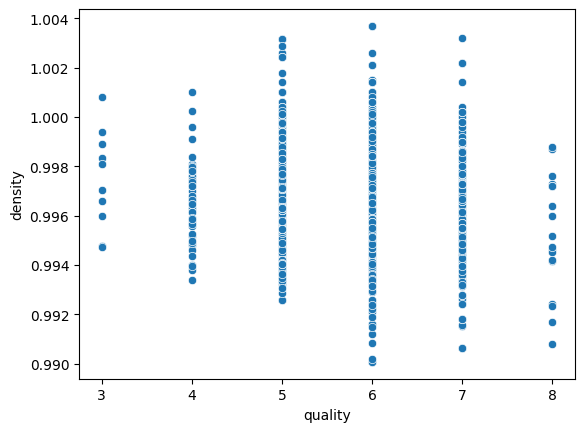

In [165]:
import seaborn as sns

sns.scatterplot(data=red_wine_quality_df, x="quality", y="density")

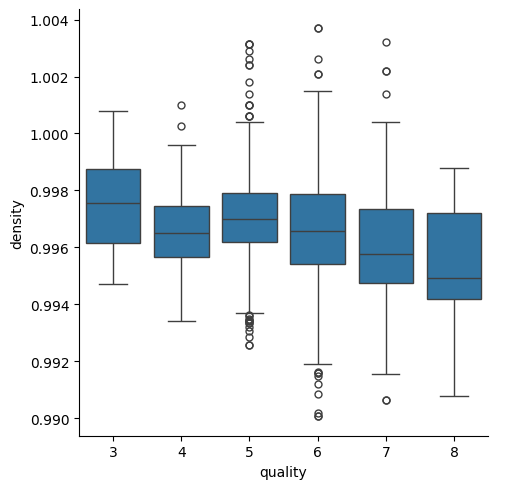

In [166]:
import seaborn as sns

sns.catplot(data=red_wine_quality_df, x="quality", y="density", kind='box')

##### pH Column

In [167]:
red_wine_quality_df.corr()['pH']['quality']

-0.05773139120538257

<Axes: xlabel='quality', ylabel='pH'>

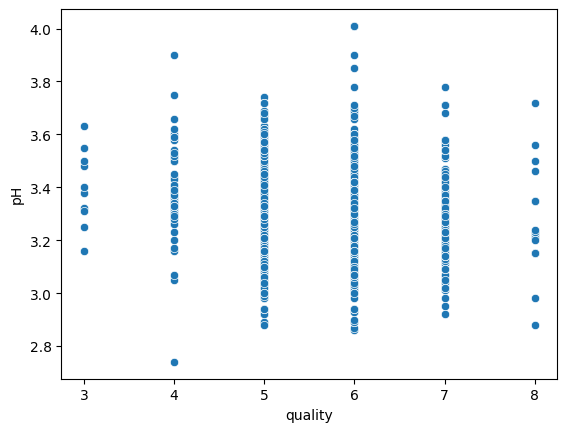

In [168]:
import seaborn as sns

sns.scatterplot(data=red_wine_quality_df, x="quality", y="pH")

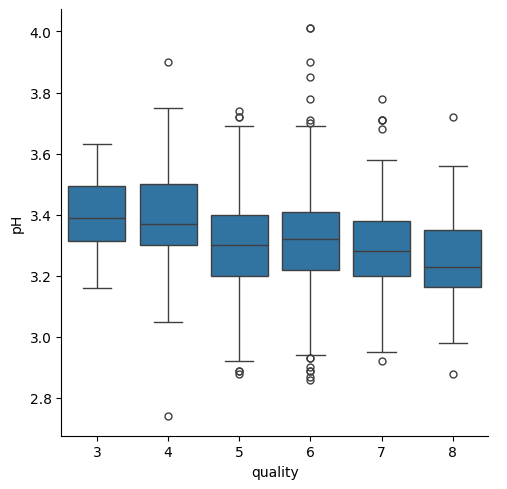

In [169]:
import seaborn as sns

sns.catplot(data=red_wine_quality_df, x="quality", y="pH", kind='box')

##### Sulphates Column

In [170]:
red_wine_quality_df.corr()['sulphates']['quality']

0.25139707906925995

<Axes: xlabel='quality', ylabel='sulphates'>

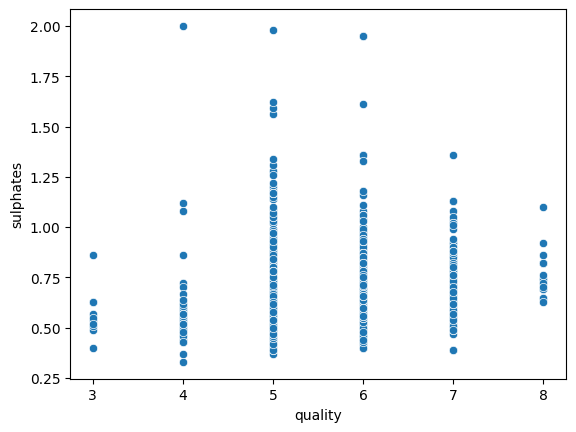

In [171]:
import seaborn as sns

sns.scatterplot(data=red_wine_quality_df, x="quality", y="sulphates")

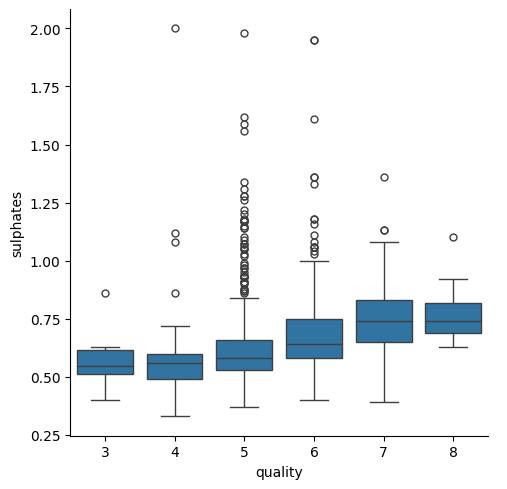

In [172]:
import seaborn as sns

sns.catplot(data=red_wine_quality_df, x="quality", y="sulphates", kind='box')

##### Alcohol Column

In [173]:
red_wine_quality_df.corr()['alcohol']['quality']

0.47616632400113656

<Axes: xlabel='quality', ylabel='alcohol'>

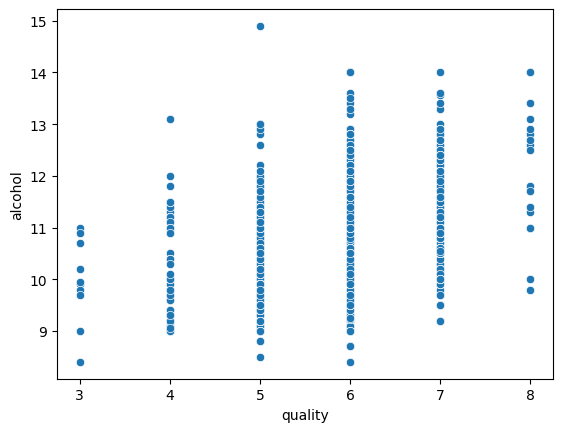

In [174]:
import seaborn as sns

sns.scatterplot(data=red_wine_quality_df, x="quality", y="alcohol")

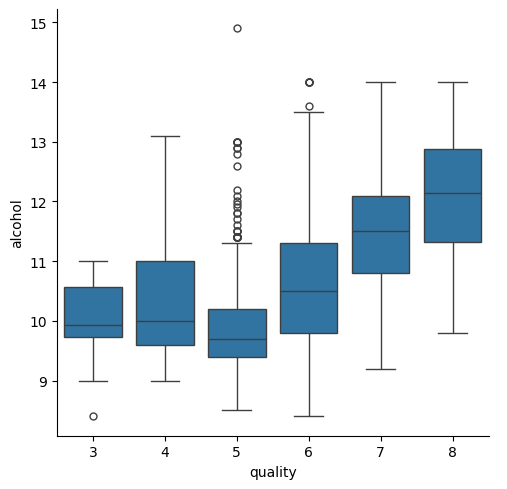

In [175]:
import seaborn as sns

sns.catplot(data=red_wine_quality_df, x="quality", y="alcohol", kind='box')